El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN. Datos:

In [1]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data" )
abalone = pd.read_csv(url, header=None)
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings
from time import time

warnings.filterwarnings("ignore")

1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [5]:
df = abalone.drop(['Sex'], axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


2. Realice estadística descriptiva para el conjunto de datos entregados.

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

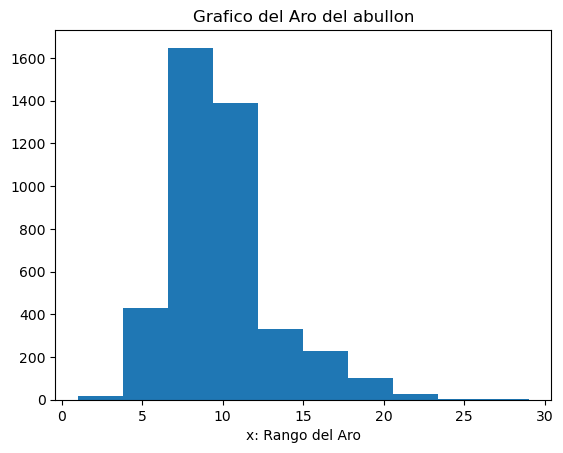

In [10]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df["Rings"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico del Aro del abullon')
plt.xlabel('x: Rango del Aro')
plt.show()

In [11]:
df['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

Al ser Ring, la variable objetivo se cuenta un total de 4177 datos el promedio es de 9.9 y la desviacion es de 3.2. Luego de ver al grfica de los datos, este pareciera tener una distribucion cercana a la normal, pero con una acumulacion de datos a la izquerda. Esto tambien se puede identificar al tener el creo de los datos en valor 9 y el peromedio de 9.9.   

4. Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

In [14]:
corr = df.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):
- 0: asociación nula.
- 0.1: asociación pequeña.
- 0.3: asociación mediana.
- 0.5: asociación moderada.
- 0.7: asociación alta.
- 0.9: asociación muy alta.

Respecto al largo, exste una correlacion muy alta entre el diametro, peso completo y el peso de la visera. 
Respecto al diametro, exste una correlacion muy alta entre el largo, peso completo y el peso de la cascara. 
Respecto al peso completo, exste una correlacion muy alta entre el largo, diametro, peso descascarillado, peso de la visera y el peso de la cascara.
Respecto al peso descascarillado , exste una correlacion muy alta entre el peso completo y el peso de la visera.
Respecto al peso de la visera, exste una correlacion muy alta entre el largo, peso completo, peso descascarillado y el peso de la cascara.
Respecto al peso de la cascara , exste una correlacion muy alta entre el diametro, peso completo y el peso de la visera.

Respecto a los aros, exste una correlacion moderada peromero entre el peso de la cascara, diametro, alto, largo, peso completo y el peso de la visera. 

5. Defina las distancias en los vectores de las variables independientes. Para esto puede usar el atributo .values de Numpy

In [48]:
X = df.drop("Rings", axis=1)
X = X.values
y = df["Rings"]
y = y.values

X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

6. Guarde los datos en una matriz y úselo en este código:distances = np.linalg.norm(X - new_data_point, axis=1)

In [51]:
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])
t1 = time()
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

7. Determine cuáles son los tres vecinos más cercanos.

In [57]:
k=3
nearest_neighbor_ids = distances.argsort()[:k]
print(nearest_neighbor_ids)
nearest_neighbor_rings = y[nearest_neighbor_ids]
print("Los tres vecinos mas cercanos segun en aro: ", nearest_neighbor_rings)

[4045 1902 1644]
Los tres vecinos mas cercanos segun en aro:  [ 9 11 10]


In [54]:
prediction = nearest_neighbor_rings.mean()
print(prediction)

10.0


In [55]:
t2 = time()-t1
print(t2)

195.36618661880493
